## MOHAMED AARIZ 
## DST 11223

# LOAN STATUS PREDICTION - Supervised Binary Classification

In the realm of finance, the ability to predict loan approval outcomes accurately is paramount for both lenders and borrowers alike. With the advent of advanced computational techniques, supervised machine learning has emerged as a powerful tool for addressing this challenge. In this project, we delve into the realm of supervised machine learning applied to the context of loan approval prediction. Our aim is to develop predictive models that can effectively discern the likelihood of loan approval based on a set of relevant features extracted from historical data.

The dataset at the core of our investigation is aptly named 'Loan Status Prediction'. This dataset encompasses a diverse array of attributes ranging from demographic information to financial indicators, all of which contribute to the decision-making process in loan approval scenarios. Leveraging this data, our objective is to construct robust predictive models that can assist financial institutions in automating and optimizing their loan approval procedures.

Through this project, we endeavor to demonstrate the efficacy of supervised machine learning algorithms in discerning patterns and relationships within complex datasets. By harnessing the power of algorithms such as decision trees, support vector machines, and ensemble methods, we seek to uncover insights that can enhance the accuracy and efficiency of loan approval processes. Ultimately, our endeavor is not only to showcase the potential of machine learning in the domain of finance but also to contribute to the advancement of data-driven decision-making practices in lending institutions.

[Kaggle Dataset Link](https://www.kaggle.com/datasets/ashishkumarjayswal/loanamount-approval)

## Importing Necessary Packages & Dataset

In [1]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df = pd.read_csv('Loan_Data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Data Preprocessing

In [3]:
df.shape

(614, 13)

In [4]:
df = df.drop_duplicates()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df = df.dropna(subset=['Gender','Married','Credit_History'])
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed        26
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           20
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [8]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed        26
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           20
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df.shape

(549, 13)

In [10]:
df = df.drop(['Loan_ID','CoapplicantIncome'], axis=1)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,187.0,360.0,1.0,Urban,Y


## Feature Engineering

### Getting Insights

In [11]:
print('Credit History 0 : Loan Status Y ',(len(df[(df['Credit_History']==0.) & (df['Loan_Status']=='Y')])/len(df[df['Loan_Status']=='Y']))*100,'%')
print('Credit History 0 : Loan Status N ',(len(df[(df['Credit_History']==0.) & (df['Loan_Status']=='N')])/len(df[df['Loan_Status']=='N']))*100,'%')
print('Credit History 1 : Loan Status Y ',(len(df[(df['Credit_History']==1.) & (df['Loan_Status']=='Y')])/len(df[df['Loan_Status']=='Y']))*100,'%')
print('Credit History 1 : Loan Status N ',(len(df[(df['Credit_History']==1.) & (df['Loan_Status']=='N')])/len(df[df['Loan_Status']=='N']))*100,'%')
print()
print('Gender M : Loan Status Y ',(len(df[(df['Gender']=='Male') & (df['Loan_Status']=='Y')])/len(df[df['Loan_Status']=='Y']))*100,'%')
print('Gender M : Loan Status N ',(len(df[(df['Gender']=='Male') & (df['Loan_Status']=='N')])/len(df[df['Loan_Status']=='N']))*100,'%')
print('Gender F : Loan Status Y ',(len(df[(df['Gender']=='Female') & (df['Loan_Status']=='Y')])/len(df[df['Loan_Status']=='Y']))*100,'%')
print('Gender F : Loan Status N ',(len(df[(df['Gender']=='Female') & (df['Loan_Status']=='N')])/len(df[df['Loan_Status']=='N']))*100,'%')
print()
print('Married Y : Loan Status Y ',(len(df[(df['Married']=='Yes') & (df['Loan_Status']=='Y')])/len(df[df['Loan_Status']=='Y']))*100,'%')
print('Married Y : Loan Status N ',(len(df[(df['Married']=='Yes') & (df['Loan_Status']=='N')])/len(df[df['Loan_Status']=='N']))*100,'%')
print('Married N : Loan Status Y ',(len(df[(df['Married']=='No') & (df['Loan_Status']=='Y')])/len(df[df['Loan_Status']=='Y']))*100,'%')
print('Married N : Loan Status N ',(len(df[(df['Married']=='No') & (df['Loan_Status']=='N')])/len(df[df['Loan_Status']=='N']))*100,'%')
print()
print('Education Y : Loan Status Y ',(len(df[(df['Education']=='Graduate') & (df['Loan_Status']=='Y')])/len(df[df['Loan_Status']=='Y']))*100,'%')
print('Education Y : Loan Status N ',(len(df[(df['Education']=='Graduate') & (df['Loan_Status']=='N')])/len(df[df['Loan_Status']=='N']))*100,'%')
print('Education N : Loan Status Y ',(len(df[(df['Education']=='Not Graduate') & (df['Loan_Status']=='Y')])/len(df[df['Loan_Status']=='Y']))*100,'%')
print('Education N : Loan Status N ',(len(df[(df['Education']=='Not Graduate') & (df['Loan_Status']=='N')])/len(df[df['Loan_Status']=='N']))*100,'%')
print()
print('Property Area U : Loan Status Y ',(len(df[(df['Property_Area']=='Urban') & (df['Loan_Status']=='Y')])/len(df[df['Loan_Status']=='Y']))*100,'%')
print('Property Area U : Loan Status N ',(len(df[(df['Property_Area']=='Urban') & (df['Loan_Status']=='N')])/len(df[df['Loan_Status']=='N']))*100,'%')
print('Property Area R : Loan Status Y ',(len(df[(df['Property_Area']=='Rural') & (df['Loan_Status']=='Y')])/len(df[df['Loan_Status']=='Y']))*100,'%')
print('Property Area R : Loan Status N ',(len(df[(df['Property_Area']=='Rural') & (df['Loan_Status']=='N')])/len(df[df['Loan_Status']=='N']))*100,'%')
print('Property Area S : Loan Status Y ',(len(df[(df['Property_Area']=='Semiurban') & (df['Loan_Status']=='Y')])/len(df[df['Loan_Status']=='Y']))*100,'%')
print('Property Area S : Loan Status N ',(len(df[(df['Property_Area']=='Semiurban') & (df['Loan_Status']=='N')])/len(df[df['Loan_Status']=='N']))*100,'%')
print()
print('Total Loan Approved ',len(df[df['Loan_Status']=='Y']))
print('Total Loan Rejected ',len(df[df['Loan_Status']=='N']))

Credit History 0 : Loan Status Y  1.866666666666667 %
Credit History 0 : Loan Status N  45.40229885057471 %
Credit History 1 : Loan Status Y  98.13333333333333 %
Credit History 1 : Loan Status N  54.59770114942529 %

Gender M : Loan Status Y  82.93333333333334 %
Gender M : Loan Status N  79.3103448275862 %
Gender F : Loan Status Y  17.066666666666666 %
Gender F : Loan Status N  20.689655172413794 %

Married Y : Loan Status Y  67.2 %
Married Y : Loan Status N  58.04597701149425 %
Married N : Loan Status Y  32.800000000000004 %
Married N : Loan Status N  41.95402298850575 %

Education Y : Loan Status Y  80.80000000000001 %
Education Y : Loan Status N  72.41379310344827 %
Education N : Loan Status Y  19.2 %
Education N : Loan Status N  27.586206896551722 %

Property Area U : Loan Status Y  30.4 %
Property Area U : Loan Status N  36.7816091954023 %
Property Area R : Loan Status Y  26.13333333333333 %
Property Area R : Loan Status N  36.206896551724135 %
Property Area S : Loan Status Y  43.

### Major Trends that correlates with the Prediction (Y)
1) Gender - Male
2) Credit History - 1
3) Education - Graduate

<Figure size 1500x1000 with 0 Axes>

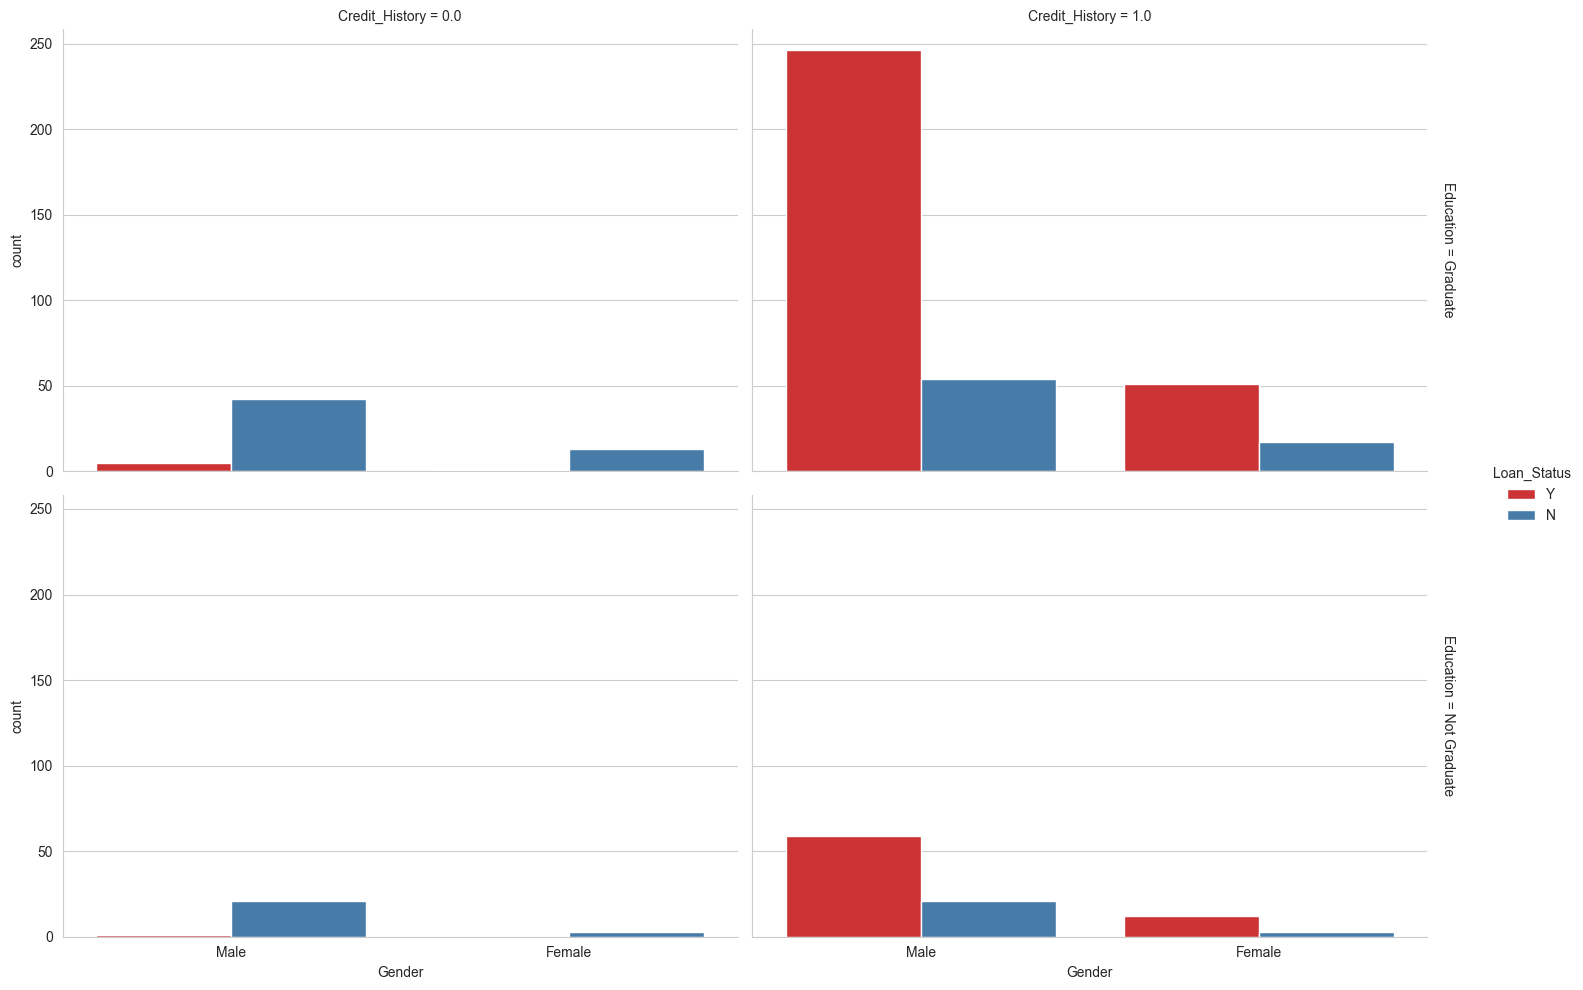

In [12]:
plt.figure(figsize=(15, 10))
sns.set_style('whitegrid')

# Create count plot with hue
sns.catplot(x='Gender', hue='Loan_Status', col='Credit_History', row='Education',
            data=df, kind='count', palette='Set1', height=5, aspect=1.5, margin_titles=True)

plt.show()

In [13]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [14]:
for column in ['Gender','Married','Dependents','Education','Loan_Amount_Term','Credit_History','Self_Employed','Property_Area','Loan_Status']:
    unique_values = df[column].unique()
    print(f"Unique values for column '{column}': {unique_values}")

Unique values for column 'Gender': ['Male' 'Female']
Unique values for column 'Married': ['No' 'Yes']
Unique values for column 'Dependents': ['0' '1' '2' '3+' nan]
Unique values for column 'Education': ['Graduate' 'Not Graduate']
Unique values for column 'Loan_Amount_Term': [360. 120.  nan 180.  60. 300. 480. 240.  36.  84.]
Unique values for column 'Credit_History': [1. 0.]
Unique values for column 'Self_Employed': ['No' 'Yes' nan]
Unique values for column 'Property_Area': ['Urban' 'Rural' 'Semiurban']
Unique values for column 'Loan_Status': ['Y' 'N']


In [15]:
df.isna().sum()

Gender               0
Married              0
Dependents          12
Education            0
Self_Employed       26
ApplicantIncome      0
LoanAmount          20
Loan_Amount_Term    14
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
def convert_to_string(obj):
    if pd.notna(obj):
        return str(obj)
    else:
        return obj

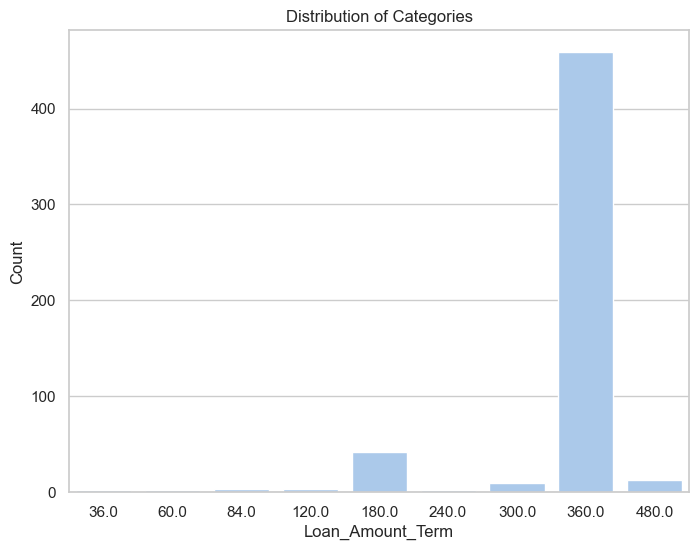

In [17]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.set_palette("pastel")
sns.countplot(x="Loan_Amount_Term", data=df)
plt.title('Distribution of Categories')
plt.xlabel('Loan_Amount_Term')
plt.ylabel('Count')
plt.show()

In [18]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].apply(convert_to_string)

In [19]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

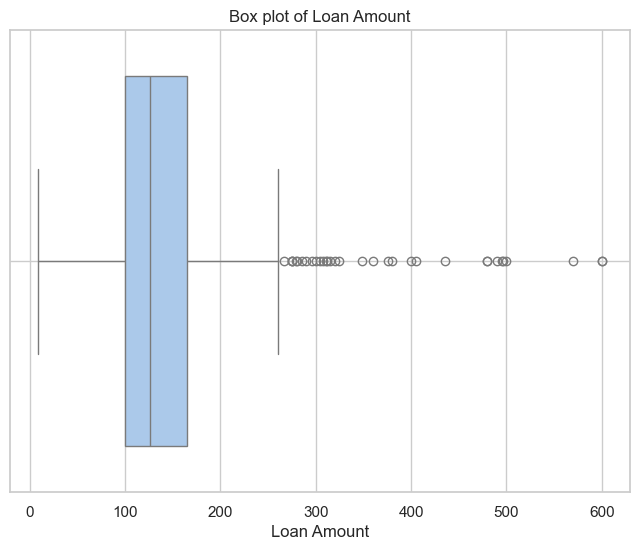

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['LoanAmount'])
plt.title('Box plot of Loan Amount')
plt.xlabel('Loan Amount')
plt.grid(True)
plt.show()

In [21]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

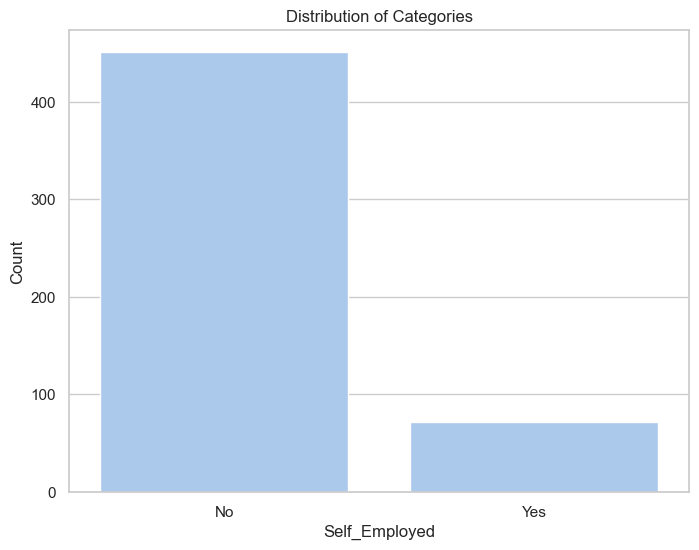

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Self_Employed', data=df)
plt.title('Distribution of Categories')
plt.xlabel('Self_Employed')
plt.ylabel('Count')
plt.show()

In [23]:
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

## Label Encoding Dataset for Training

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_le = df
for i in ['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Property_Area','Loan_Status']:
    df_le[i] = le.fit_transform(df_le[i])

df_le.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,126.0,5,1.0,2,1
1,1,1,1,0,0,4583,128.0,5,1.0,0,0
2,1,1,0,0,1,3000,66.0,5,1.0,2,1
3,1,1,0,1,0,2583,120.0,5,1.0,2,1
4,1,0,0,0,0,6000,141.0,5,1.0,2,1


In [25]:
df_le.isna().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
ApplicantIncome     0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
dtype: int64

In [26]:
df_le

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,126.0,5,1.0,2,1
1,1,1,1,0,0,4583,128.0,5,1.0,0,0
2,1,1,0,0,1,3000,66.0,5,1.0,2,1
3,1,1,0,1,0,2583,120.0,5,1.0,2,1
4,1,0,0,0,0,6000,141.0,5,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,71.0,5,1.0,0,1
610,1,1,3,0,0,4106,40.0,1,1.0,0,1
611,1,1,1,0,0,8072,253.0,5,1.0,2,1
612,1,1,2,0,0,7583,187.0,5,1.0,2,1


### Finding the Correlation between each columns

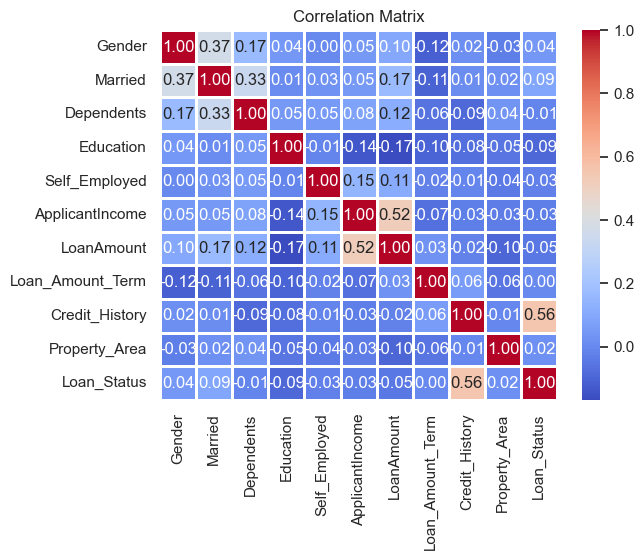

In [27]:
correlation_matrix = df_le.corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1)
plt.title('Correlation Matrix')
plt.show()

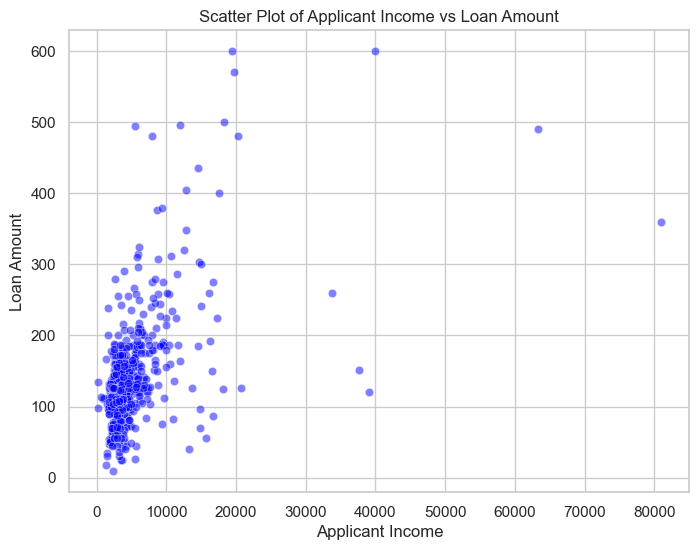

In [28]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=df_le, color='blue', alpha=0.5)
plt.title('Scatter Plot of Applicant Income vs Loan Amount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.grid(True)
plt.show()

## Normalizing Skewed Values and Outliers

In [29]:
from sklearn.preprocessing import MinMaxScaler
minmax_scalar = MinMaxScaler()

df_le['ApplicantIncome'] = minmax_scalar.fit_transform(df_le[['ApplicantIncome']])
df_le['LoanAmount'] = minmax_scalar.fit_transform(df_le[['LoanAmount']])

In [30]:
df_le

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.070489,0.197970,5,1.0,2,1
1,1,1,1,0,0,0.054830,0.201354,5,1.0,0,0
2,1,1,0,0,1,0.035250,0.096447,5,1.0,2,1
3,1,1,0,1,0,0.030093,0.187817,5,1.0,2,1
4,1,0,0,0,0,0.072356,0.223350,5,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0.034014,0.104907,5,1.0,0,1
610,1,1,3,0,0,0.048930,0.052453,1,1.0,0,1
611,1,1,1,0,0,0.097984,0.412860,5,1.0,2,1
612,1,1,2,0,0,0.091936,0.301184,5,1.0,2,1


## Building Machine Learning Models

In [31]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

target_columns = ['Loan_Status']

X = df_le.drop(target_columns, axis=1) 
y = df_le[target_columns]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify= y, random_state=5)

In [33]:
print(X.shape, X_train.shape, X_test.shape)

(549, 10) (439, 10) (110, 10)


## Finding Accuracy and Metrices

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
models = {
    'SVM': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': range(1,20),
            'kernel': ['rbf','sigmoid'],
        }  
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': range(1,100,2)
        }
    },
    'Logistic Regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': range(1,10)
        }
    },
    'Decision Tree':{
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion':['gini','entropy'],
            'max_depth':[3,5,7,10],
        }
    },
    'Naive Bayes':{
        'model': GaussianNB(),
        'params':{
            'var_smoothing':[1e-9, 1e-8, 1e-7]
        }
    },
    'KNN':{
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
        }
    }
}


## Model Hyperparameter Tuning

In [36]:
from sklearn.model_selection import GridSearchCV


scores = []

for model_name, mp in models.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

c:\Users\aariz\anaconda3\envs\TF\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\aariz\anaconda3\envs\TF\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\aariz\anaconda3\envs\TF\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\aariz\anaconda3\envs\TF\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

,model,best_score,best_params
0,SVM,0.812427,"{'C': 2, 'kernel': 'rbf'}"
1,Random Forest,0.794195,{'n_estimators': 85}
2,Logistic Regression,0.810575,{'C': 1}
3,Decision Tree,0.814245,"{'criterion': 'entropy', 'max_depth': 3}"
4,Naive Bayes,0.801418,{'var_smoothing': 1e-09}
5,KNN,0.748641,"{'algorithm': 'auto', 'n_neighbors': 5, 'weigh..."


Since the no. of data is insufficient for the model to get higher accuracy scores

In [37]:
# def compare_scores():
#     for model in models:
#         models[model].fit(X_train, y_train)
#         test_data_prediction = models[model].predict(X_test)
#         accuracy = accuracy_score(y_test, test_data_prediction)
#         print('Accuracy score of the',model,' : ',accuracy)

In [38]:
# compare_scores()

In [39]:
# def cross_score():
#     for model in models:
#         print(cross_val_score(models[model],X,y,cv=5))

In [40]:
# cross_score()

In [46]:
y_pred = clf.predict([[0,	0,	0,	0,	1,	0.054830,	0.209814,	5,	0.0,	1]])
print(y_pred)

[0]


c:\Users\aariz\anaconda3\envs\TF\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [41]:
import pickle
filename = 'model.sav'
pickle.dump(clf, open(filename, 'wb'))